<a href="https://colab.research.google.com/github/EricCallaway/COSC_6315_Programming_Assignment-1/blob/main/Multivariable_Linear_Regression01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import pandas as pd
import numpy as np

Import Dataset

In [ ]:
path = '/MVLR_Train.csv'
test_path = '/MVLR_Test.csv'
data_df = pd.read_csv(path)
data_df_test = pd.read_csv(test_path)

First five rows of Training dataset.

In [ ]:
data_df.head()

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,GarageYrBlt,GarageCars,GarageArea,YrSold,SalePrice
0,1,60,65.0,8450,2003,2003,2003.0,2,548,2008,208500
1,2,20,80.0,9600,1976,1976,1976.0,2,460,2007,181500
2,3,60,68.0,11250,2001,2002,2001.0,2,608,2008,223500
3,4,70,60.0,9550,1915,1970,1998.0,3,642,2006,140000
4,5,60,84.0,14260,2000,2000,2000.0,3,836,2008,250000


First five rows of Testing dataset

In [ ]:
data_df_test.head()

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,GarageYrBlt,GarageCars,GarageArea,YrSold
0,1461,20,80,11622,1961,1961,1961,1,730,2010
1,1462,20,81,14267,1958,1958,1958,1,312,2010
2,1463,60,74,13830,1997,1998,1997,2,482,2010
3,1464,60,78,9978,1998,1998,1998,2,470,2010
4,1465,120,43,5005,1992,1992,1992,2,506,2010


Define X and Y

In [ ]:
x_cols = ['LotArea', 'YearBuilt', 'YearRemodAdd']
x_train=data_df[x_cols].values
x_test=data_df_test[x_cols].values

y_col = ['SalePrice']
y_train=data_df[y_col].values

print(x_train)
print(x_test)
print(y_train)

[[ 8450  2003  2003]
 [ 9600  1976  1976]
 [11250  2001  2002]
 ...
 [ 9042  1941  2006]
 [ 9717  1950  1996]
 [ 9937  1965  1965]]
[[11622  1961  1961]
 [14267  1958  1958]
 [13830  1997  1998]
 ...
 [20000  1960  1996]
 [10441  1992  1992]
 [ 9627  1993  1994]]
[[208500]
 [181500]
 [223500]
 ...
 [266500]
 [142125]
 [147500]]


Train Model

In [ ]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)


LinearRegression()

Predict the Test, set Results

In [ ]:
y_pred=ml.predict(x_test)
y_train_pred=ml.predict(x_train)
print(y_pred)

[[146254.16970075]
 [145449.36116818]
 [225930.29086686]
 ...
 [203000.16698682]
 [207612.16716766]
 [209179.05737864]]


In [ ]:
ml.predict([[8450,2003,2003]])

array([[226195.98832227]])

Evaluate the Model

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_train,y_train_pred)

0.39825091432058835

Save Predictions to .csv file

In [ ]:
prediction = pd.DataFrame(y_pred, columns=['SalePrice(Predicted)']).to_csv(test_path)

Plot Results

Text(0, 0.5, 'Predicted')

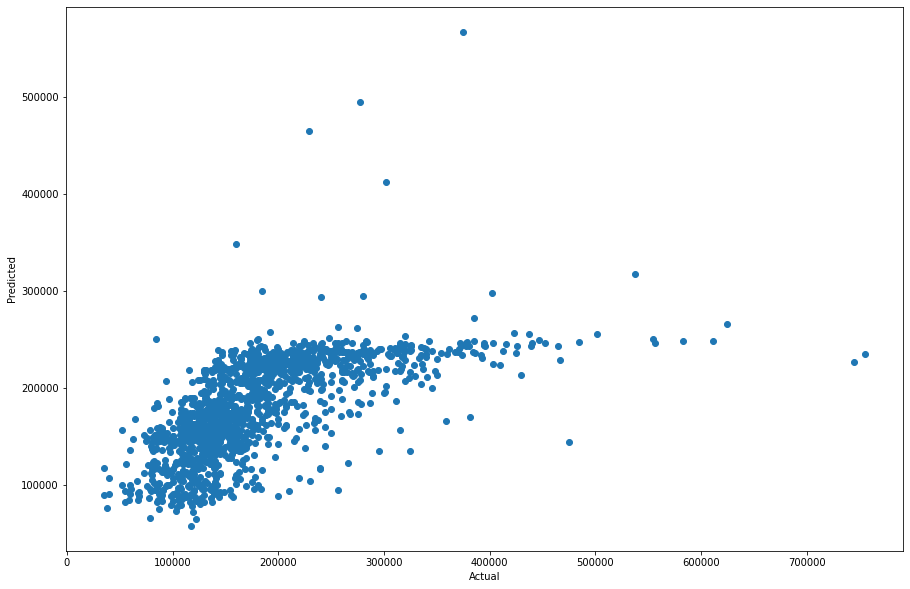

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_train,y_train_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

Predicted Values

In [ ]:
pred_y_df = pd.DataFrame({'Actual Value': [y_train], 'Predicted Value': [y_train_pred], 'Difference': [y_train-y_train_pred]})
pred_y_df[0:20]

,Actual Value,Predicted Value,Difference
0,"[[208500], [181500], [223500], [140000], [2500...","[[226195.98832227383], [173001.36240647454], [...","[[-17695.988322273828], [8498.637593525462], [..."
